In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn

In [2]:
results = pd.read_csv('task_stats.csv')
results.head()

,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,...,Trial_9_FixedResponse_1_ResponseAmplitude,Trial_10_FixedResponse_1_ResponseAmplitude,Trial_11_FixedResponse_1_ResponseAmplitude,Trial_12_FixedResponse_1_ResponseAmplitude,mean_US,mean_noUS,mean_delta_US,mean_CSplus,mean_CSminus,mean_delta_CS
0,0,0,0,0,0,0,0,0,0,0,...,0.161887,0.196392,0.254141,0.114721,0.644628,0.115075,0.529553,0.045264,0.054709,-0.009446
1,1,1,1,1,1,1,1,1,1,1,...,0.153607,0.000535,0.209187,0.073263,0.289491,0.133546,0.155944,0.054914,0.048453,0.006461
2,2,2,2,2,2,2,2,2,2,2,...,0.000833,0.225272,1.089315,0.540699,0.803903,0.057492,0.746411,0.792000,0.126646,0.665354
3,3,3,3,3,3,3,3,3,3,3,...,0.001853,0.010349,0.096938,0.115305,0.259773,0.001042,0.258730,0.105119,0.031184,0.073935
4,4,4,4,4,4,4,4,4,4,4,...,0.262853,0.637056,0.201383,0.144585,0.475633,0.291279,0.184354,0.092943,0.101804,-0.008861


In [3]:
results_long = pd.melt(results, id_vars=['subject', 'condition'], value_vars=[
                                'Trial_1_FixedResponse_1_ResponseAmplitude', 
                                'Trial_4_FixedResponse_1_ResponseAmplitude', 
                                'Trial_8_FixedResponse_1_ResponseAmplitude', 
                                'Trial_11_FixedResponse_1_ResponseAmplitude', 
                                'Trial_6_FixedResponse_1_ResponseAmplitude', 
                                'Trial_9_FixedResponse_1_ResponseAmplitude', 
                                "Trial_1_FlexibleResponse_1_Amplitude",
                                 "Trial_4_FlexibleResponse_1_Amplitude",
                                 "Trial_6_FlexibleResponse_1_Amplitude",
                                 "Trial_8_FlexibleResponse_1_Amplitude",
                                 "Trial_9_FlexibleResponse_1_Amplitude",
                                 "Trial_11_FlexibleResponse_1_Amplitude",
                                 "Trial_2_FlexibleResponse_1_Amplitude",
                                 "Trial_3_FlexibleResponse_1_Amplitude",
                                 "Trial_5_FlexibleResponse_1_Amplitude",
                                 "Trial_7_FlexibleResponse_1_Amplitude",
                                 "Trial_10_FlexibleResponse_1_Amplitude",
                                 "Trial_12_FlexibleResponse_1_Amplitude"])

results_long["variable"].replace({"Trial_1_FixedResponse_1_ResponseAmplitude": "US", 
                                  "Trial_4_FixedResponse_1_ResponseAmplitude": "US",
                                 "Trial_8_FixedResponse_1_ResponseAmplitude": "US",
                                 "Trial_11_FixedResponse_1_ResponseAmplitude": "US",
                                 "Trial_6_FixedResponse_1_ResponseAmplitude": "noUS",
                                 "Trial_9_FixedResponse_1_ResponseAmplitude": "noUS",
                                 "Trial_1_FlexibleResponse_1_Amplitude": "CSplus",
                                 "Trial_4_FlexibleResponse_1_Amplitude": "CSplus",
                                 "Trial_6_FlexibleResponse_1_Amplitude": "CSplus",
                                 "Trial_8_FlexibleResponse_1_Amplitude": "CSplus",
                                 "Trial_9_FlexibleResponse_1_Amplitude": "CSplus",
                                 "Trial_11_FlexibleResponse_1_Amplitude": "CSplus",
                                 "Trial_2_FlexibleResponse_1_Amplitude": "CSminus",
                                 "Trial_3_FlexibleResponse_1_Amplitude": "CSminus",
                                 "Trial_5_FlexibleResponse_1_Amplitude": "CSminus",
                                 "Trial_7_FlexibleResponse_1_Amplitude": "CSminus",
                                 "Trial_10_FlexibleResponse_1_Amplitude": "CSminus",
                                 "Trial_12_FlexibleResponse_1_Amplitude": "CSminus"}, inplace=True)

results_long = results_long.rename({'value': 'amplitude'}, axis=1)
results_long = results_long[results_long["condition"] != "ctr2"]
results_long

,subject,condition,variable,amplitude
0,AG,ctr1,US,1.199073
2,AG,exp,US,1.137584
3,KF,ctr1,US,0.383572
5,KF,exp,US,1.009725
6,RP,ctr1,US,0.109564
...,...,...,...,...
479,KG,exp,CSminus,0.080215
480,KL,ctr1,CSminus,0.158148
482,KL,exp,CSminus,0.072849
483,KT,ctr1,CSminus,0.043008


In [4]:
results_long_USnoUS = results_long.loc[(results_long['variable'] == 'US') | (results_long['variable'] == 'noUS')]
results_long_USnoUS['Index'] = range(1, len(results_long_USnoUS) + 1)

pd.set_option('display.max_rows', None)
results_long_USnoUS

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_36524/2315871533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_long_USnoUS['Index'] = range(1, len(results_long_USnoUS) + 1)


,subject,condition,variable,amplitude,Index
0,AG,ctr1,US,1.199073,1
2,AG,exp,US,1.137584,2
3,KF,ctr1,US,0.383572,3
5,KF,exp,US,1.009725,4
6,RP,ctr1,US,0.109564,5
8,RP,exp,US,1.042919,6
9,TJ,ctr1,US,0.206857,7
11,TJ,exp,US,0.599607,8
12,AH,ctr1,US,0.083472,9
14,AH,exp,US,0.295742,10


In [5]:
import pingouin as pg
pg.rm_anova(dv='amplitude', within=['condition', 'variable'], subject='subject', data=results_long_USnoUS)

/Users/aantosz/anaconda3/lib/python3.8/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,condition,0.676515,1,8,0.676515,25.478784,0.000992,0.000992,0.343814,1.0
1,variable,1.061654,1,8,1.061654,29.391477,0.000630,0.000630,0.451227,1.0
2,condition * variable,0.231565,1,8,0.231565,32.465078,0.000456,0.000456,0.152073,1.0


In [6]:
pg.pairwise_ttests(dv = 'amplitude', within = ['condition', 'variable'], subject = 'subject', data = results_long_USnoUS, padjust = 'bonf')

/Users/aantosz/anaconda3/lib/python3.8/site-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/aantosz/anaconda3/lib/python3.8/site-packages/pingouin/pairwise.py:477: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()
/Users/aantosz/anaconda3/lib/python3.8/site-packages/pingouin/pairwise.py:477: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index

,Contrast,condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,condition,-,ctr1,exp,True,True,-5.047651,8.0,two-sided,0.000992,NaN,NaN,41.404,-1.519350
1,variable,-,US,noUS,True,True,5.421391,8.0,two-sided,0.000630,NaN,NaN,60.301,1.830620
2,condition * variable,ctr1,US,noUS,True,True,2.667827,8.0,two-sided,0.028458,0.056916,bonf,2.804,0.947359
3,condition * variable,exp,US,noUS,True,True,7.195023,8.0,two-sided,0.000093,0.000186,bonf,299.36,2.217387


In [7]:
pg.pairwise_ttests(dv = 'amplitude', within = ['variable', 'condition'], subject = 'subject', data = results_long_USnoUS, padjust = 'bonf')

/Users/aantosz/anaconda3/lib/python3.8/site-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/aantosz/anaconda3/lib/python3.8/site-packages/pingouin/pairwise.py:477: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()
/Users/aantosz/anaconda3/lib/python3.8/site-packages/pingouin/pairwise.py:477: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index

,Contrast,variable,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,variable,-,US,noUS,True,True,5.421391,8.0,two-sided,0.000630,NaN,NaN,60.301,1.830620
1,condition,-,ctr1,exp,True,True,-5.047651,8.0,two-sided,0.000992,NaN,NaN,41.404,-1.519350
2,variable * condition,US,ctr1,exp,True,True,-5.624668,8.0,two-sided,0.000496,0.000992,bonf,73.549,-1.572300
3,variable * condition,noUS,ctr1,exp,True,True,-2.921729,8.0,two-sided,0.019240,0.038481,bonf,3.798,-1.014462


In [8]:
sem = results_long_USnoUS.groupby(["condition", "variable"])["amplitude"].sem()
sem = sem.reindex(['exp', 'ctr1'], level='condition') #odwrócenie kolejności, żeby się zgadzało ze słupkami
sem

condition  variable
exp        US          0.060631
           noUS        0.042299
ctr1       US          0.051291
           noUS        0.021907
Name: amplitude, dtype: float64

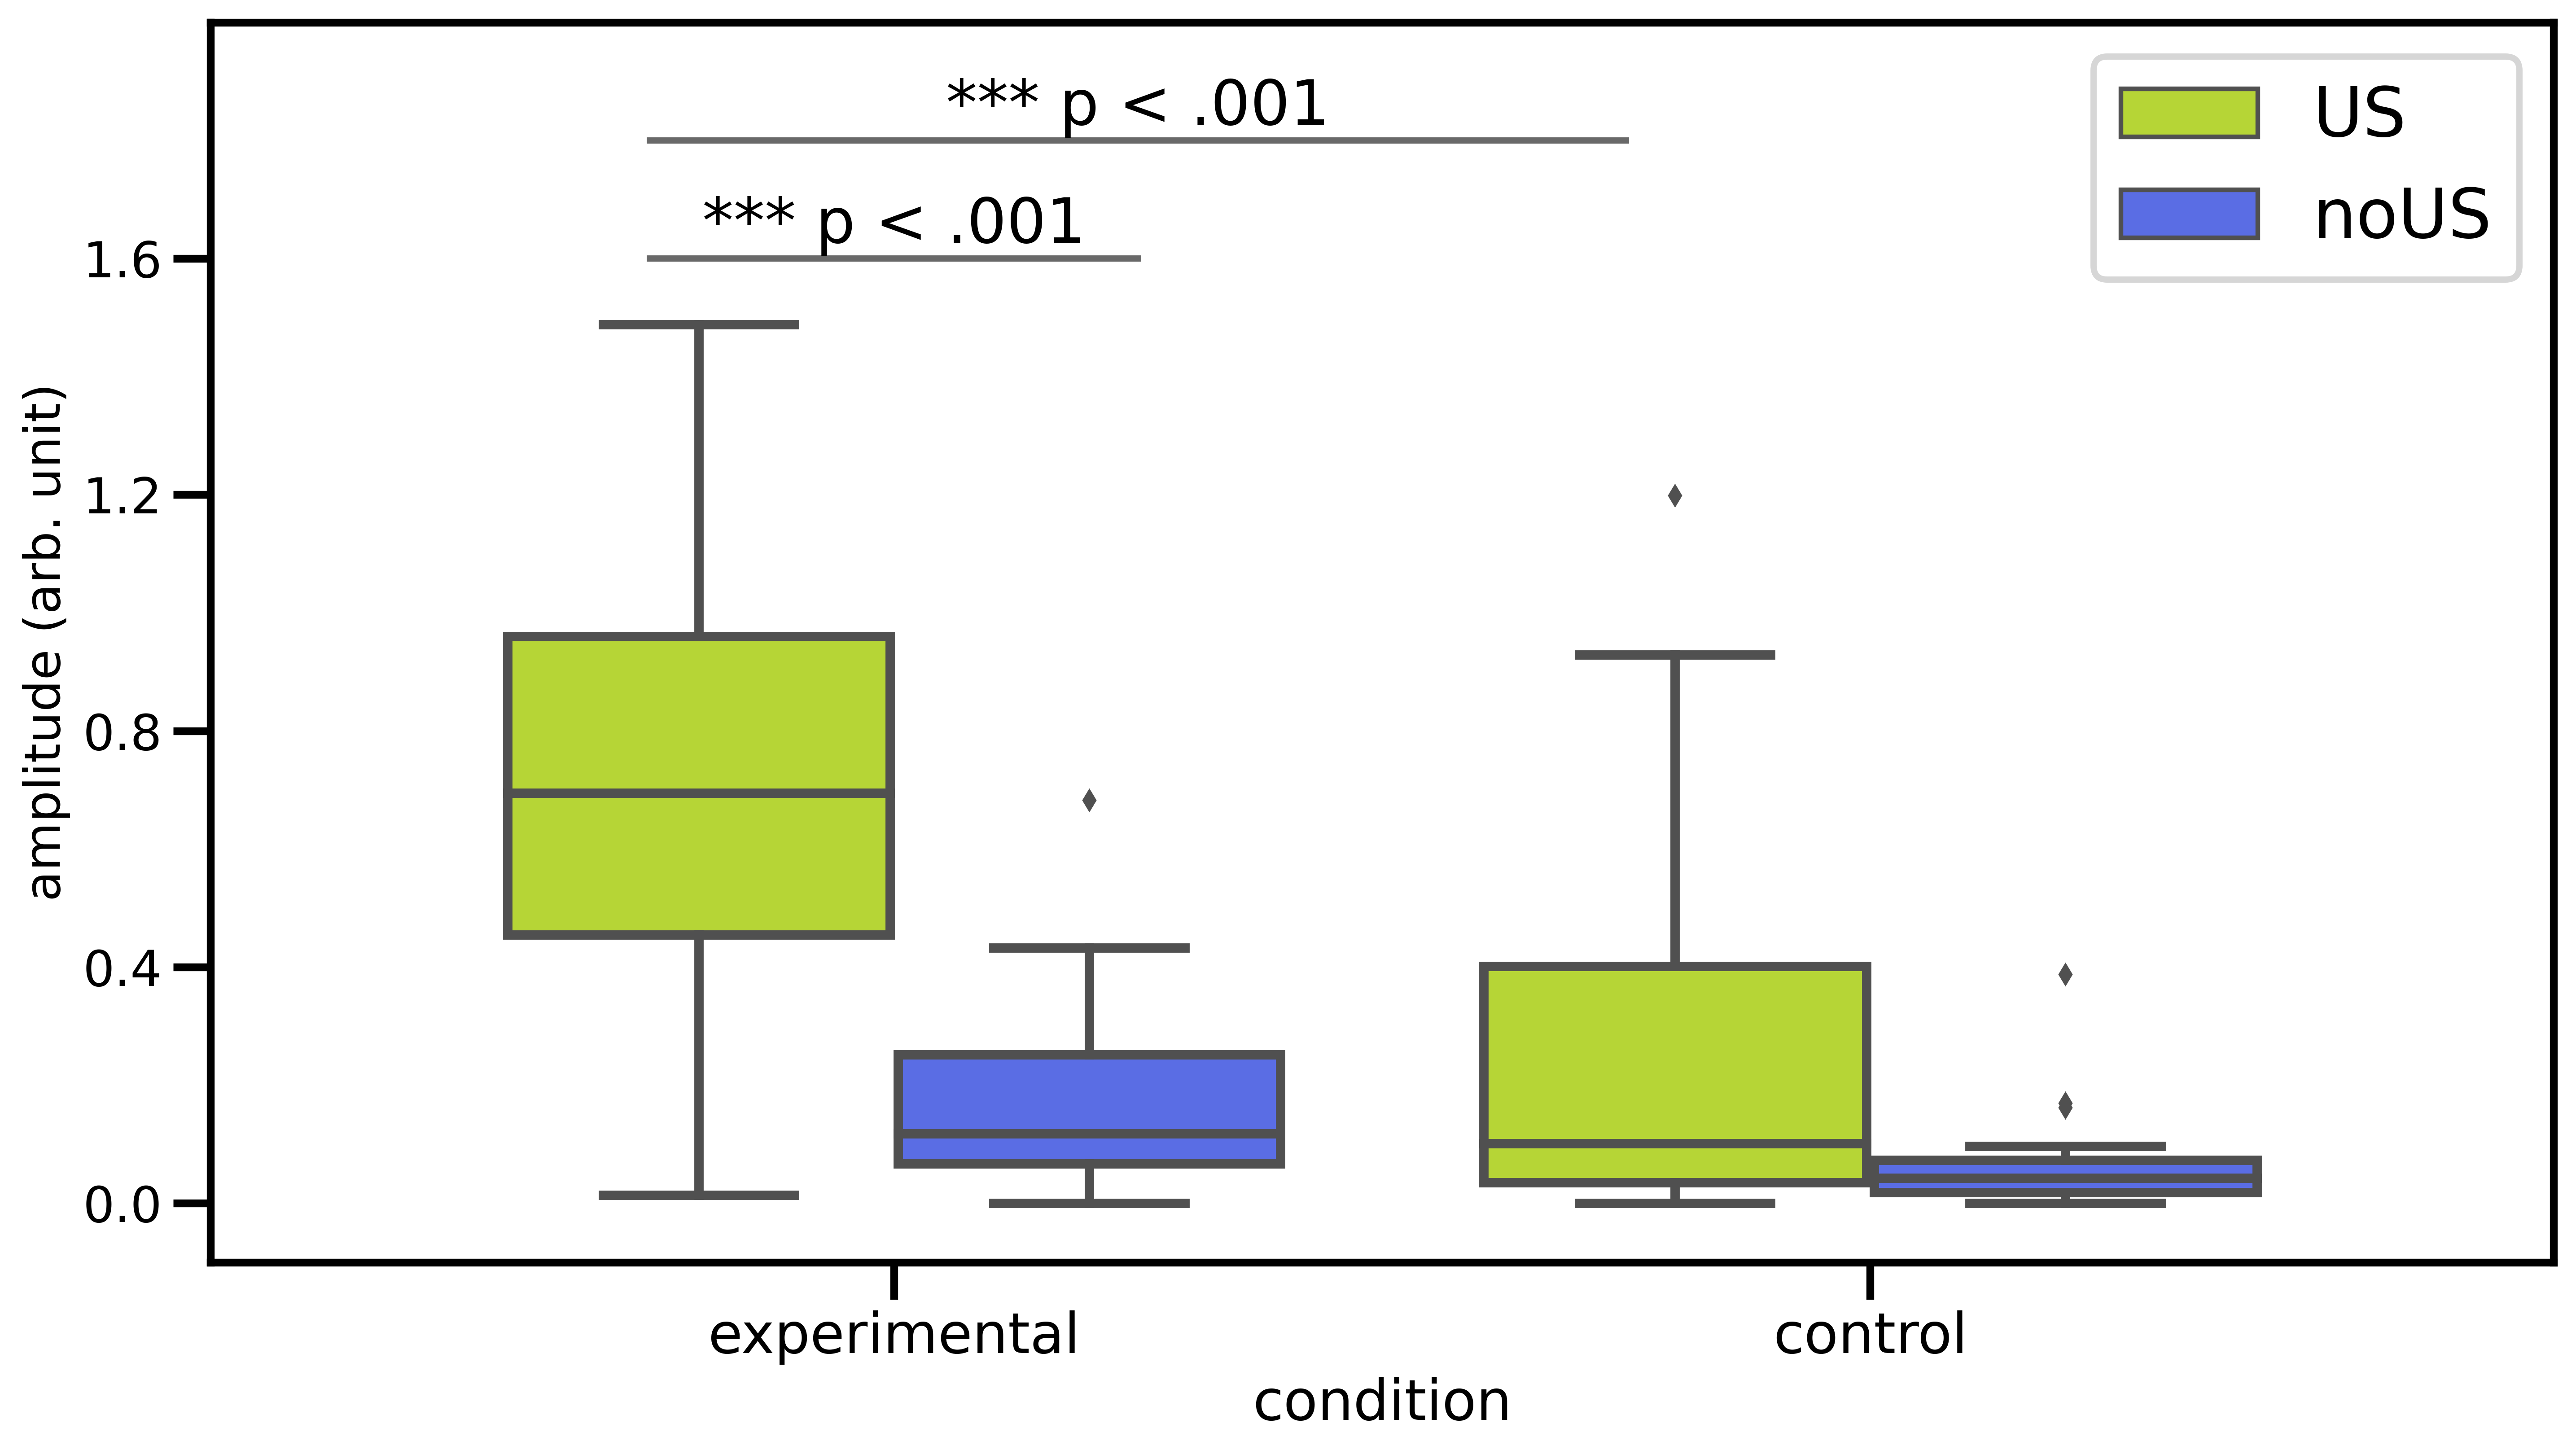

In [38]:
# boxplot US vs noUS

plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#C7EF1B', '#435CFB'])

ax = seaborn.boxplot(x="condition", y="amplitude", hue="variable", hue_order=["US", "noUS"],
                     data=results_long_USnoUS, order=['exp', 'ctr1'], palette=pal_1, fliersize=4)

plt.xlabel("condition", fontsize=18)
plt.ylabel("amplitude (arb. unit)", fontsize=16)
plt.xticks(fontsize=18, ticks=[0,1], labels=['experimental', 'control'])
plt.yticks(np.arange(0,2,0.4), fontsize=16)
plt.ylim(-0.1,2)

plt.plot([-0.25,-0.25,0.25,0.25], [1.6, 1.6, 1.6, 1.6], linewidth=2, color='dimgrey') 
plt.text((-0.25 + 0.25)*0.5, 1.6+0.005, "*** p < .001", ha="center", va='bottom', color='k', fontsize=20)

plt.plot([-0.25,-0.25,0.75,0.75], [1.8, 1.8, 1.8, 1.8], linewidth=2, color='dimgrey') 
plt.text((-0.25 + 0.75)*0.5, 1.8+0.005, "*** p < .001", ha="center", va='bottom', color='k', fontsize=20)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.savefig('wykresy/boxplotUS_noUS.tiff')
plt.show()

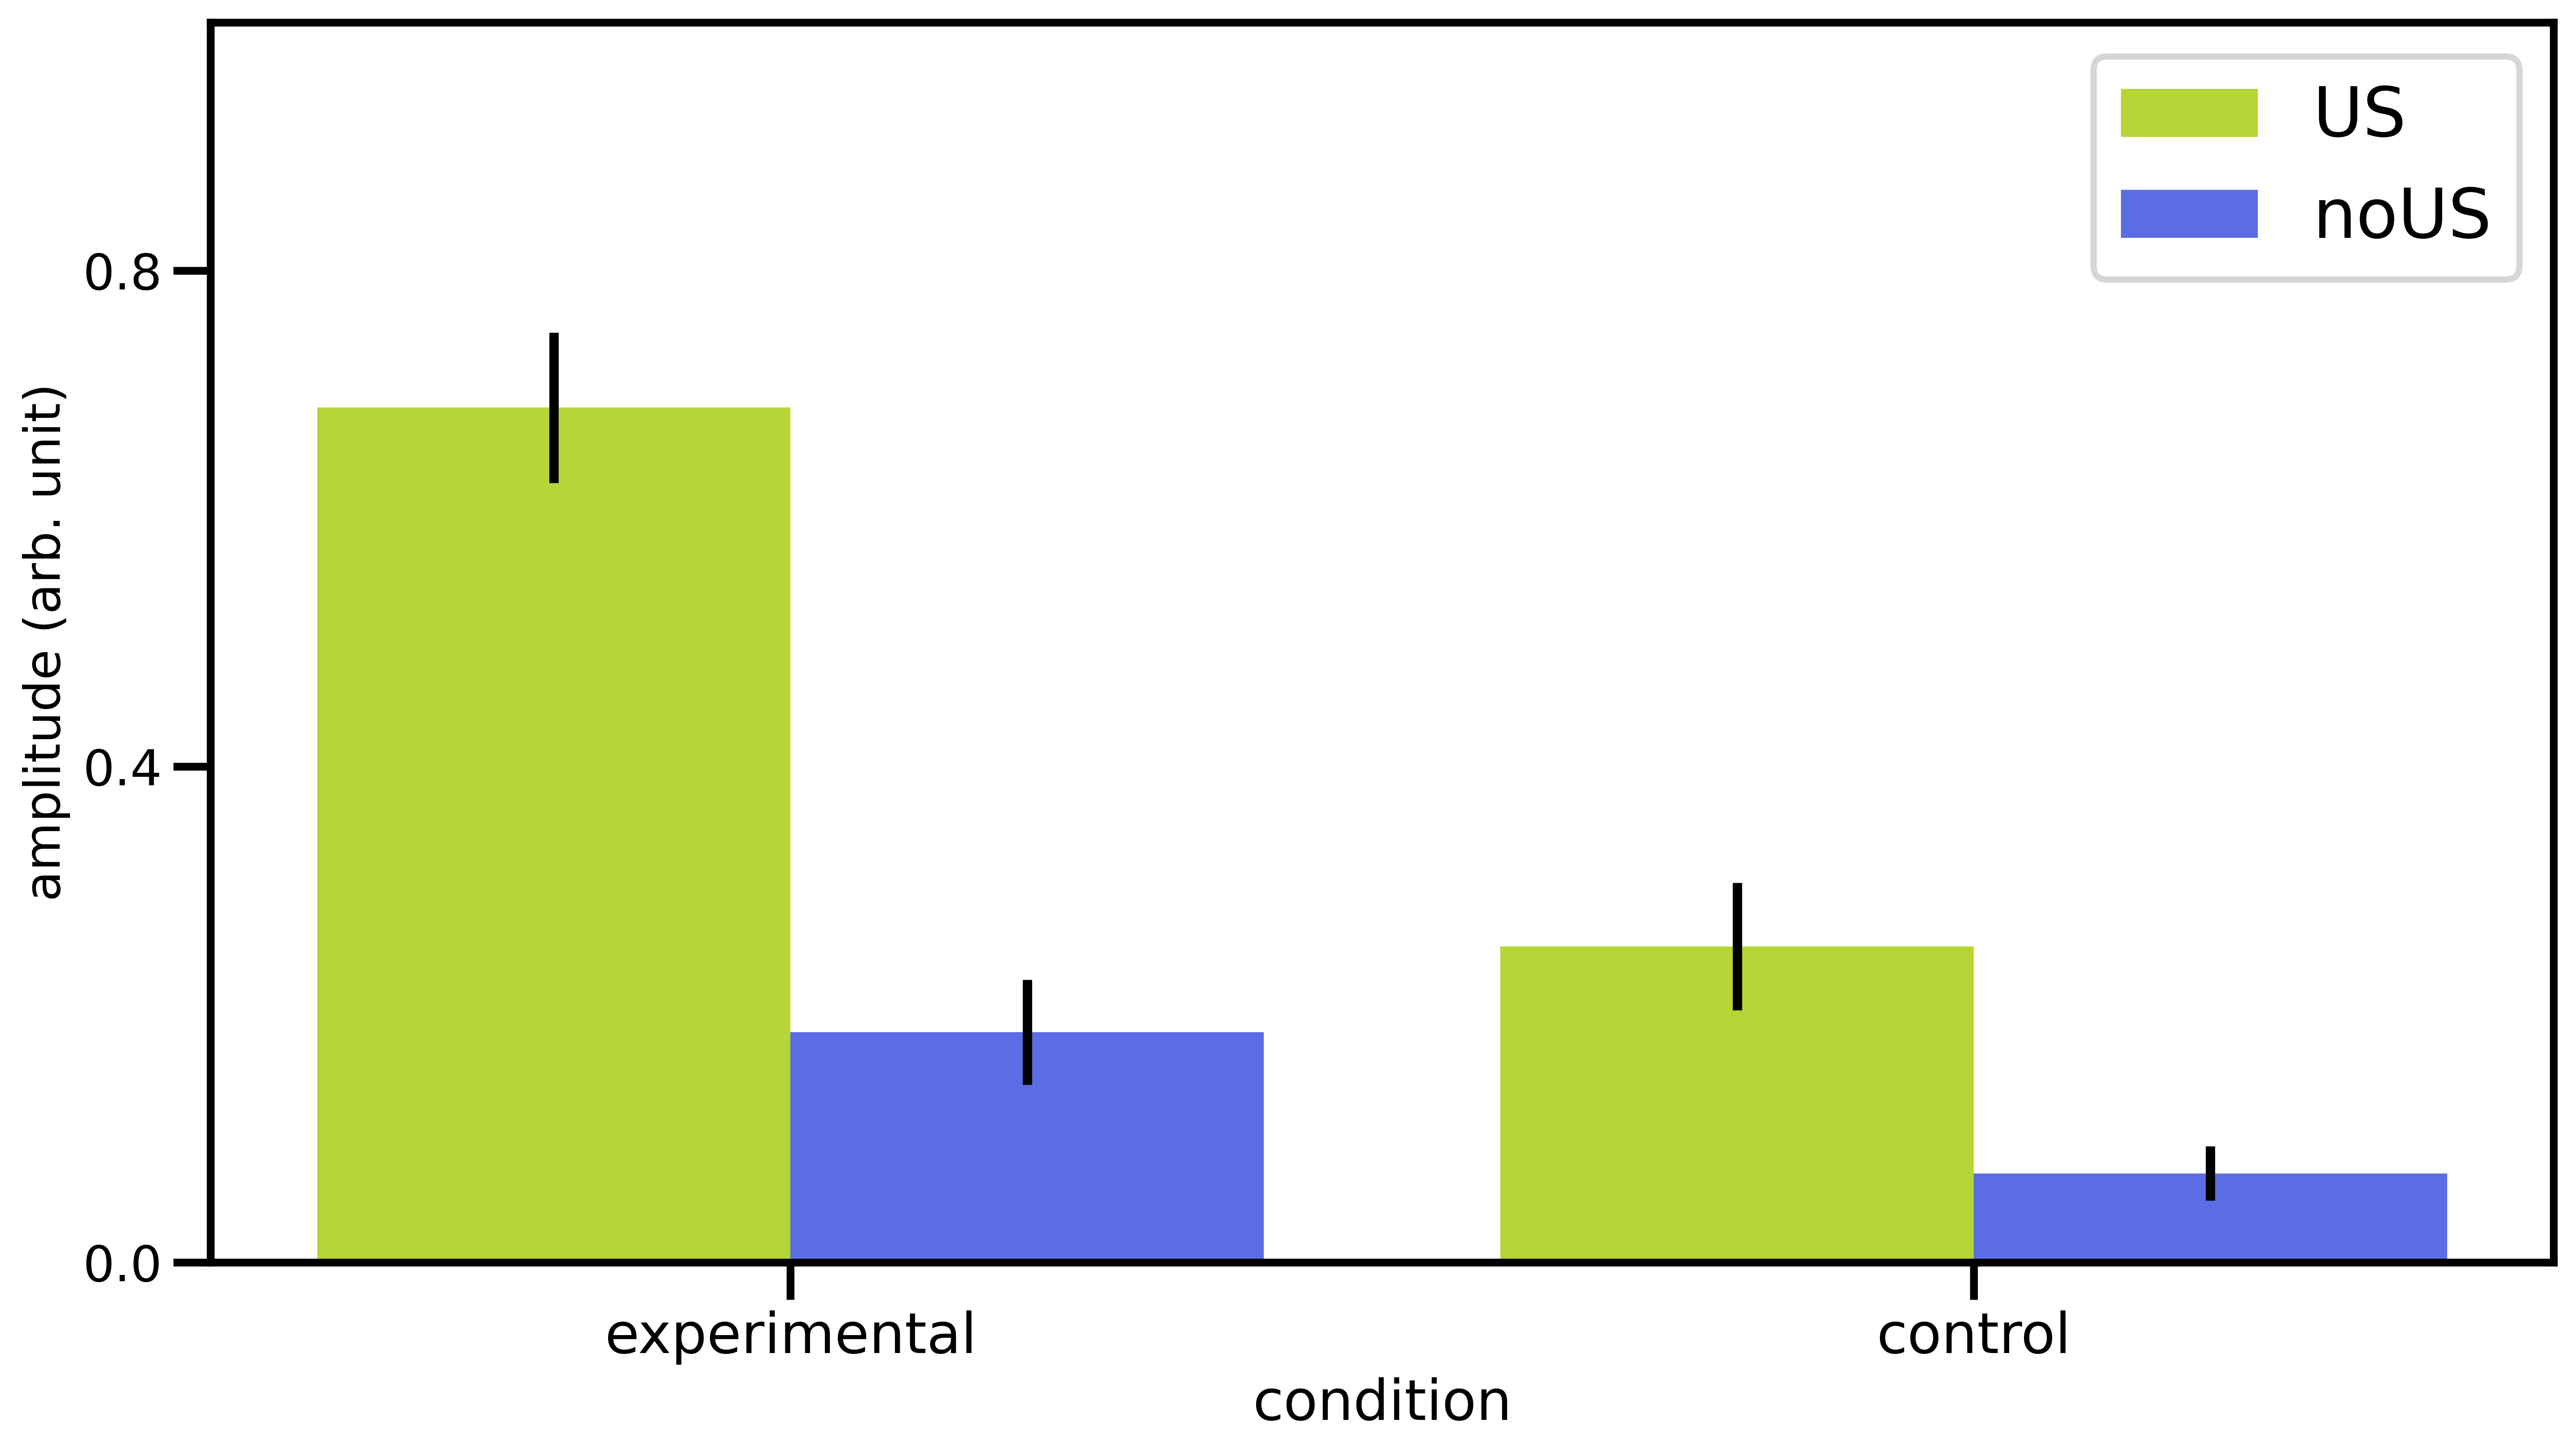

In [44]:
# barplot US vs noUS

plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#C7EF1B', '#435CFB', '#C7EF1B', '#435CFB'])

ax = seaborn.barplot(x="condition", y="amplitude", hue="variable", hue_order=["US", "noUS"],
                     data=results_long_USnoUS, order=['exp', 'ctr1'], palette=pal_1, 
                     errorbar=None, errwidth=1)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, sem, fmt=' ', ecolor='black')

plt.xlabel("condition", fontsize=18)
plt.ylabel("amplitude (arb. unit)", fontsize=16)
plt.xticks(fontsize=18, ticks=[0,1], labels=['experimental', 'control'])
plt.yticks(np.arange(0,1,0.4), fontsize=16)
plt.ylim(0,1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.savefig('wykresy/barplot_US_noUS.tiff')
plt.show()